# Redshift Data of DESIJ0201-2739

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.stats import SigmaClip
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import (
    SourceCatalog,
    SourceFinder,
    deblend_sources,
    detect_sources,
)

In [2]:
data, header = fits.getdata("DESIJ1554+0443_F140W_drz_sci.fits", header=True)

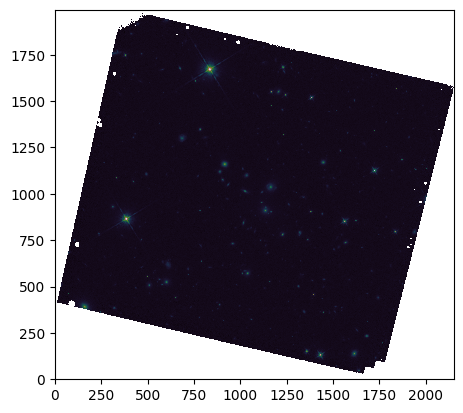

In [3]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [5]:
FILENAME = "legacy_DESIJ1554+0443" #need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.007949,8000358665002828,238.569453,4.719671,8000,358665,2828,REX,0.057,R0,0.746,0.246,1,1
1,0.007014,8000358665002829,238.569710,4.720576,8000,358665,2829,REX,0.005,R0,0.723,0.405,1,0
2,0.006456,8000358665002849,238.567650,4.721877,8000,358665,2849,REX,0.000,R4,0.751,0.063,1,1
3,0.007550,8000358665002850,238.565573,4.722067,8000,358665,2850,REX,0.008,R4,0.716,0.060,1,1
4,0.006307,8000358665002853,238.566021,4.723405,8000,358665,2853,REX,0.004,R0,0.835,0.491,1,0


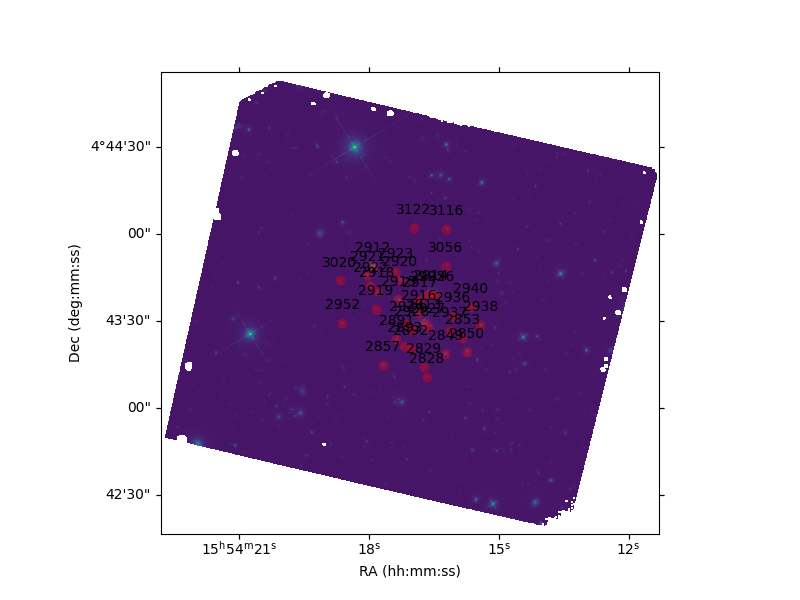

In [7]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
#norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap='viridis')

x_scatter, y_scatter = wcs.all_world2pix(data_legacy['RAJ2000'], data_legacy['DEJ2000'], 0)

# Plot scatter points
ax.scatter(x_scatter, y_scatter, color='red', marker='o', label='J2000 RA/Dec', alpha=0.3)

#write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy['objid'][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(f'{obj_id}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels
ax.set_xlabel('RA (hh:mm:ss)')
ax.set_ylabel('Dec (deg:mm:ss)')

plt.show()

In [16]:
#In degrees
center_x, center_y = 238.5688333, 4.7275000 # RA 15:54:17 DEC 04:43:39
radii = 15 # in arcsec
radii_deg = radii/3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg 
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

987.8851863534215 1361.6106223166628


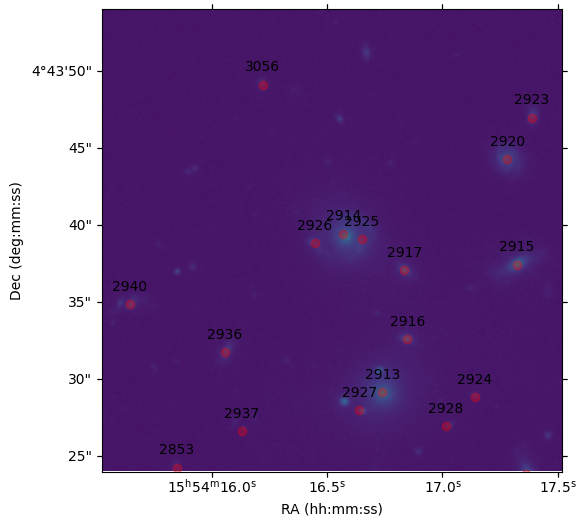

In [17]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
#norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap='viridis')

x_scatter, y_scatter = wcs.all_world2pix(data_legacy['RAJ2000'], data_legacy['DEJ2000'], 0)

# Plot scatter points
ax.scatter(x_scatter, y_scatter, color='red', marker='o', label='J2000 RA/Dec', alpha=0.3)

#write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy['objid'][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(f'{obj_id}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel('RA (hh:mm:ss)')
ax.set_ylabel('Dec (deg:mm:ss)')

In [18]:
data_legacy.sort_values(by="objid")

object_ids = [2914, # central deflector
            2926, 2925, 2917, 2916]

columns_to_drop = ['id', 'RAJ2000', 'DEJ2000', 'release', 'brickid']  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[data_legacy_dropped['objid'].isin(object_ids)]
selected_data_legacy.set_index('objid', inplace=True)

print(selected_data_legacy)

             _r type  pstar gmmcomp  zphot  e_zphot  fclean  fqual
objid                                                             
2914   0.001796  DEV  0.250      D8  0.591    0.058       0      0
2916   0.001895  PSF  0.003      P3  0.478    0.289       1      1
2917   0.000876  REX  0.009      R6  0.722    0.164       1      1
2925   0.001451  EXP  0.000      E6  0.894    0.137       0      0
2926   0.002298  EXP  0.001      E5  1.064    0.299       0      0
